<a href="https://colab.research.google.com/github/justingivens9583/CS4410-JG/blob/master/CS4410_Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 5



##**Part 1**

###Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

###Loading the Dataset

In [2]:
iris = load_iris()
X = iris.data

###Range of K values to test

In [3]:
wcss = []
K_range = range(1, 10)

###Perform K-means for each K and store the WCSS

In [4]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=11)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

###Plotting the Graph

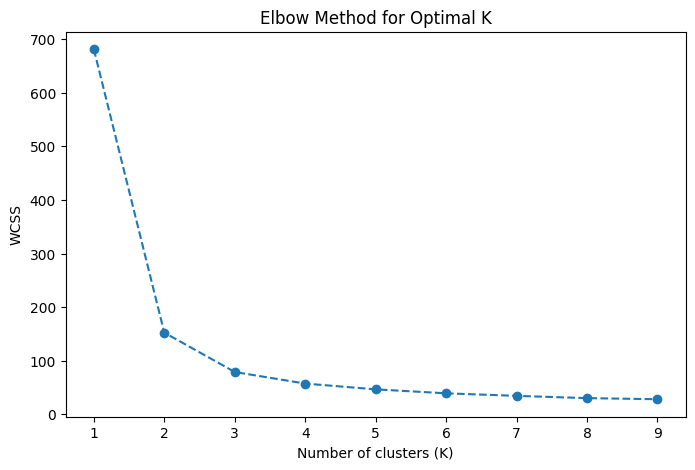

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

##**Part 2**

###Importing modules

In [6]:
import numpy as np
import pandas as pd
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

###Loading the dataset

In [10]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


###Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

###Applying StandardScaler

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Logistic Regression without PCA

In [13]:
start_time = time.time()
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr.fit(X_train_scaled, y_train)
y_pred = logisticRegr.predict(X_test_scaled)
accuracy_without_pca = accuracy_score(y_test, y_pred)
time_without_pca = time.time() - start_time

###Logistic Regression with PCA

In [14]:
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

start_time = time.time()
logisticRegr_pca = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr_pca.fit(X_train_pca, y_train)
y_pred_pca = logisticRegr_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)
time_with_pca = time.time() - start_time

###Comparing Results

In [15]:
print(f"Accuracy without PCA: {accuracy_without_pca}")
print(f"Time without PCA: {time_without_pca} seconds")

print(f"Accuracy with PCA: {accuracy_with_pca}")
print(f"Time with PCA: {time_with_pca} seconds")

Accuracy without PCA: 0.9132857142857143
Time without PCA: 269.0629253387451 seconds
Accuracy with PCA: 0.9213571428571429
Time with PCA: 115.08117747306824 seconds
